# Evaluación - Redes Convolucionales

**Autor:** Jorge Riffo - Lucas Poblete

**Correo Electrónico:** j.riffo@duocuc.cl - luc.poblete@duocuc.cl

**Fecha de Creación:** Mayo de 2025

**Versión:** 1.0  

---

## Descripción

Este notebook contiene el desarrollo de la entrega 2 de la asignatura optativa de Deep Learning de DuocUC Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- tensorflow (2.18.0)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import tensorflow as tf
print(tf.__version__)
````

# Entregable

Utilizando Convolutional Neural Networks con Keras, entrenar un clasificador que sea capaz de reconocer personajes en imágenes de los Simpsons con una accuracy en el dataset de test de **85%**. Redactar un informe analizando varias de las alternativas probadas y los resultados obtenidos.

A continuación se detallan una serie de aspectos orientativos que podrían ser analizados en el informe:

*   Análisis de los datos a utilizar.
*   Análisis de resultados, obtención de métricas de *precision* y *recall* por clase y análisis de qué clases obtienen mejores o peores resultados.
*   Análisis visual de los errores de la red. ¿Qué tipo de imágenes o qué personajes dan más problemas al modelo?
*   Comparación de modelos CNNs con un modelo de Fully Connected para este problema.
*   Utilización de distintas arquitecturas CNNs, comentando aspectos como su profundidad, hiperparámetros utilizados, optimizador, uso de técnicas de regularización, *batch normalization*, entre otras.
*   [ *algo más difícil* ] Utilización de *data augmentation*. Esto puede conseguirse con la clase [ImageDataGenerator](https://keras.io/preprocessing/image/#imagedatagenerator-class) de Keras.

✅ **Notas**
* Recuerda partir los datos en training/validation para tener una buena estimación de los valores que el modelo tendrá en los datos de test, así como comprobar que no estamos cayendo en overfitting.
* No es necesario mostrar en el notebook las trazas de entrenamiento de todos los modelos entrenados, si bien una buena idea seria guardar gráficas de esos entrenamientos para el análisis. Sin embargo, **se debe mostrar el entrenamiento completo del mejor modelo obtenido y la evaluación de los datos de test con este modelo**.
* Las imágenes **no están normalizadas**. Hay que normalizarlas como se ha hecho en trabajos anteriores.
* El test set del problema tiene imágenes un poco más "fáciles", por lo que es posible encontrarse con métricas en el test set bastante mejores que en el training set.

# Descarga de la data

In [ ]:
!wget -O simpsons_train.tar.gz https://www.dropbox.com/scl/fi/qkg3gs31xjbhv9jjqmot6/simpsons_train.tar.gz?rlkey=oqbofdqoqjrpmxjwxaphru0yr&st=b96sg8iu&dl=0

--2025-05-19 11:48:06--  https://www.dropbox.com/scl/fi/qkg3gs31xjbhv9jjqmot6/simpsons_train.tar.gz?rlkey=oqbofdqoqjrpmxjwxaphru0yr
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uce117031275d62cd6af2858c1db.dl.dropboxusercontent.com/cd/0/inline/Cp8n1B7mJtUh9OIEUSt06M1WhGsz21j9w882pE06am_V_eeLgbLrYvBWVtrMsgqlnQl-iuZWd_XN1RVuS3Wq1uAtcSvaNE0iWqdOC_UWkOZm1iwIr7h12n1YowS8BdX0j0pAfIhk497OiI0M8ZzGMhPE/file# [following]
--2025-05-19 11:48:07--  https://uce117031275d62cd6af2858c1db.dl.dropboxusercontent.com/cd/0/inline/Cp8n1B7mJtUh9OIEUSt06M1WhGsz21j9w882pE06am_V_eeLgbLrYvBWVtrMsgqlnQl-iuZWd_XN1RVuS3Wq1uAtcSvaNE0iWqdOC_UWkOZm1iwIr7h12n1YowS8BdX0j0pAfIhk497OiI0M8ZzGMhPE/file
Resolving uce117031275d62cd6af2858c1db.dl.dropboxusercontent.com (uce117031275d62cd6af2858c1db.dl.dropboxusercontent.com)... 162.125.2

In [ ]:
!wget -O simpsons_test.tar.gz https://www.dropbox.com/scl/fi/zche5dm3zgd9jysatnmka/simpsons_test.tar.gz?rlkey=iek183gc4t4w9mdnz1izhudni&st=qau98qns&dl=0

--2025-05-19 11:48:14--  https://www.dropbox.com/scl/fi/zche5dm3zgd9jysatnmka/simpsons_test.tar.gz?rlkey=iek183gc4t4w9mdnz1izhudni
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1e581d2f8dffa6e465d263d180.dl.dropboxusercontent.com/cd/0/inline/Cp-DVK4-Vjwi6SRkeHzn66IGsGbFiFFJEcEr1-JGzLkYoGcVJXix7fwY-wDQh9hfN8GFUJlv3jAuKrXIwaapOPLwSjHz3cdKBBYmQaWI9T62dRRiJFI0xhnwpUJhyVsn7PzuwjodU8rFk6tfKQrXFpIO/file# [following]
--2025-05-19 11:48:15--  https://uc1e581d2f8dffa6e465d263d180.dl.dropboxusercontent.com/cd/0/inline/Cp-DVK4-Vjwi6SRkeHzn66IGsGbFiFFJEcEr1-JGzLkYoGcVJXix7fwY-wDQh9hfN8GFUJlv3jAuKrXIwaapOPLwSjHz3cdKBBYmQaWI9T62dRRiJFI0xhnwpUJhyVsn7PzuwjodU8rFk6tfKQrXFpIO/file
Resolving uc1e581d2f8dffa6e465d263d180.dl.dropboxusercontent.com (uc1e581d2f8dffa6e465d263d180.dl.dropboxusercontent.com)... 162.125.2.

In [ ]:
!tar -xzvf simpsons_train.tar.gz

Se truncaron las últimas líneas 5000 del resultado de transmisión.
simpsons/mayor_quimby/pic_0116.jpg
simpsons/milhouse_van_houten/pic_0576.jpg
simpsons/lenny_leonard/pic_0149.jpg
simpsons/kent_brockman/pic_0446.jpg
simpsons/nelson_muntz/pic_0060.jpg
simpsons/krusty_the_clown/pic_0838.jpg
simpsons/homer_simpson/pic_0637.jpg
simpsons/homer_simpson/pic_0495.jpg
simpsons/krusty_the_clown/pic_0893.jpg
simpsons/homer_simpson/pic_0834.jpg
simpsons/homer_simpson/pic_0692.jpg
simpsons/lisa_simpson/pic_0755.jpg
simpsons/marge_simpson/pic_0654.jpg
simpsons/chief_wiggum/pic_0344.jpg
simpsons/lisa_simpson/pic_0952.jpg
simpsons/lisa_simpson/pic_1269.jpg
simpsons/marge_simpson/pic_0851.jpg
simpsons/marge_simpson/pic_1168.jpg
simpsons/chief_wiggum/pic_0541.jpg
simpsons/homer_simpson/pic_1948.jpg
simpsons/sideshow_bob/pic_0104.jpg
simpsons/lisa_simpson/pic_0278.jpg
simpsons/nelson_muntz/pic_0128.jpg
simpsons/marge_simpson/pic_0177.jpg
simpsons/milhouse_van_houten/pic_0699.jpg
simpsons/waylon_smithers/

In [ ]:
!tar -xzvf simpsons_test.tar.gz

simpsons_testset/charles_montgomery_burns_46.jpg
simpsons_testset/marge_simpson_35.jpg
simpsons_testset/abraham_grampa_simpson_9.jpg
simpsons_testset/krusty_the_clown_40.jpg
simpsons_testset/apu_nahasapeemapetilon_10.jpg
simpsons_testset/homer_simpson_24.jpg
simpsons_testset/lenny_leonard_17.jpg
simpsons_testset/marge_simpson_3.jpg
simpsons_testset/milhouse_van_houten_13.jpg
simpsons_testset/apu_nahasapeemapetilon_29.jpg
simpsons_testset/lenny_leonard_34.jpg
simpsons_testset/bart_simpson_27.jpg
simpsons_testset/ned_flanders_12.jpg
simpsons_testset/charles_montgomery_burns_3.jpg
simpsons_testset/milhouse_van_houten_30.jpg
simpsons_testset/apu_nahasapeemapetilon_46.jpg
simpsons_testset/mayor_quimby_3.jpg
simpsons_testset/kent_brockman_6.jpg
simpsons_testset/chief_wiggum_25.jpg
simpsons_testset/nelson_muntz_37.jpg
simpsons_testset/moe_szyslak_28.jpg
simpsons_testset/bart_simpson_44.jpg
simpsons_testset/homer_simpson_36.jpg
simpsons_testset/milhouse_van_houten_49.jpg
simpsons_testset/comic

In [ ]:
import cv2, os, pprint # sirven para
import numpy as np
import keras
import glob
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import collections
import tensorflow as tf
import itertools

import keras
from collections import Counter
from google.colab.patches import cv2_imshow
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.models import Sequential
from keras.layers import Input, Dense, Activation , Dropout, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD, Adadelta
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.python.keras import backend as keras_backend

# Exploración data

In [ ]:
def load_train_set(dirname : str, map_characters : np.array, verbose=True):
    """Esta función carga los datos de training en imágenes.

    Como las imágenes tienen tamaños distintas, utilizamos la librería opencv
    para hacer un resize y adaptarlas todas a tamaño IMG_SIZE x IMG_SIZE.

    Args:
        dirname: directorio completo del que leer los datos
        map_characters: variable de mapeo entre labels y personajes
        verbose: si es True, muestra información de las imágenes cargadas

    Returns:
        X, y: X es un array con todas las imágenes cargadas con tamaño
                IMG_SIZE x IMG_SIZE
              y es un array con las labels de correspondientes a cada imagen
    """
    X_train = []
    y_train = []
    for label, character in map_characters.items():
        files = os.listdir(os.path.join(dirname, character))
        images = [file for file in files if file.endswith("jpg")]
        if verbose:
          print("Leyendo {} imágenes encontradas de {}".format(len(images), character))
        for image_name in images:
            image = cv2.imread(os.path.join(dirname, character, image_name))
            X_train.append(cv2.resize(image,(IMG_SIZE, IMG_SIZE)))
            y_train.append(label)
    return np.array(X_train), np.array(y_train)

def load_test_set(dirname : str, map_characters : np.array, verbose=True):
    """Esta función funciona de manera equivalente a la función load_train_set
    pero cargando los datos de test."""
    X_test = []
    y_test = []
    reverse_dict = {v: k for k, v in map_characters.items()}
    for filename in glob.glob(dirname + '/*.*'):
        char_name = "_".join(filename.split('/')[-1].split('_')[:-1])
        if char_name in reverse_dict:
            image = cv2.imread(filename)
            image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
            X_test.append(image)
            y_test.append(reverse_dict[char_name])
    if verbose:
        print("Leídas {} imágenes de test".format(len(X_test)))
    return np.array(X_test), np.array(y_test)

In [ ]:
# Esta variable contiene un mapeo de número de clase a personaje.
# Se utilizan sólo los 18 personajes del dataset que tienen más imágenes.
MAP_CHARACTERS = {
    0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson',
    3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel',
    7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lisa_simpson',
    11: 'marge_simpson', 12: 'milhouse_van_houten', 13: 'moe_szyslak',
    14: 'ned_flanders', 15: 'nelson_muntz', 16: 'principal_skinner', 17: 'sideshow_bob'
}

# Se estandarizan todas las imágenes a tamaño 64x64
IMG_SIZE = 64

In [ ]:
# Carga los datos
DATASET_TRAIN_PATH_COLAB = "simpsons"
DATASET_TEST_PATH_COLAB = "simpsons_testset"

X, y = load_train_set(DATASET_TRAIN_PATH_COLAB, MAP_CHARACTERS)
X_test, y_test = load_test_set(DATASET_TEST_PATH_COLAB, MAP_CHARACTERS)

Leyendo 913 imágenes encontradas de abraham_grampa_simpson
Leyendo 623 imágenes encontradas de apu_nahasapeemapetilon
Leyendo 1342 imágenes encontradas de bart_simpson
Leyendo 1193 imágenes encontradas de charles_montgomery_burns
Leyendo 986 imágenes encontradas de chief_wiggum
Leyendo 469 imágenes encontradas de comic_book_guy
Leyendo 457 imágenes encontradas de edna_krabappel
Leyendo 2246 imágenes encontradas de homer_simpson
Leyendo 498 imágenes encontradas de kent_brockman
Leyendo 1206 imágenes encontradas de krusty_the_clown
Leyendo 1354 imágenes encontradas de lisa_simpson
Leyendo 1291 imágenes encontradas de marge_simpson
Leyendo 1079 imágenes encontradas de milhouse_van_houten
Leyendo 1452 imágenes encontradas de moe_szyslak
Leyendo 1454 imágenes encontradas de ned_flanders
Leyendo 358 imágenes encontradas de nelson_muntz
Leyendo 1194 imágenes encontradas de principal_skinner
Leyendo 877 imágenes encontradas de sideshow_bob
Leídas 890 imágenes de test


In [ ]:
# Se va a barajar aleatoriamente los datos. Esto es importante ya que si no
# se realiza y, por ejemplo, se escogen el 20% de los datos finales como validation
# set, se estará utilizando solo un pequeño número de personajes, ya que
# las imágenes se leen secuencialmente personaje a personaje.
perm = np.random.permutation(len(X))
X, y = X[perm], y[perm]

In [ ]:
# Separa el conjunto de datos de entrenamiento en entrenamiento y validación con 20%
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=29)

# Variables con nÚmero de elementos
X_train_num_elem = X_train.shape[0]
X_val_num_elem = X_val.shape[0]
X_test_num_elem = X_test.shape[0]

# Dimensiones
img_rows = IMG_SIZE
img_cols = IMG_SIZE
img_channels = X.shape[3]

# Número de categorías
num_categ = len(MAP_CHARACTERS)

# Comprueba que efectivamente los resultados son los esperados
print("Número de imágenes de anterior training : ", X.shape[0])
print("Número de imágenes de training (80% de anterior train) : ", X_train_num_elem)
print("Número de imágenes de validación (20% de anterior train) : ", X_val_num_elem)
print("Número de imágenes de test : ", X_test_num_elem)
print("="*15)
print("Número de resultados de anterior training : ", y.shape[0])
print("Número de resultados de training (80% de anterior train) : ", y_train.shape[0])
print("Número de resultadoss de validación (20% de anterior train) : ", y_val.shape[0])
print("Número de resultados de test : ", y_test.shape[0])
print("="*15)
print("Dimensiones de training : ", X_train.shape)
print("Dimensiones de validation : ", X_val.shape)
print("Dimensiones de tests : ", X_test.shape)
print("="*15)
print("Canales de color para las imagenes : ", img_channels)
print("Resolución imágenes de anterior training : ", X.shape[1], "x", X.shape[2])
print("Resolución imágenes de training (80% de anterior train) : ", X_train.shape[1], "X", X_train.shape[2])
print("Resolución imágenes de validación (20% de anterior train) : ", X_val.shape[1], "x", X_val.shape[2])
print("Resolución imágenes de test : ", X_test.shape[1], "x", X_test.shape[2])

Número de imágenes de anterior training :  18992
Número de imágenes de training (80% de anterior train) :  15193
Número de imágenes de validación (20% de anterior train) :  3799
Número de imágenes de test :  890
Número de resultados de anterior training :  18992
Número de resultados de training (80% de anterior train) :  15193
Número de resultadoss de validación (20% de anterior train) :  3799
Número de resultados de test :  890
Dimensiones de training :  (15193, 64, 64, 3)
Dimensiones de validation :  (3799, 64, 64, 3)
Dimensiones de tests :  (890, 64, 64, 3)
Canales de color para las imagenes :  3
Resolución imágenes de anterior training :  64 x 64
Resolución imágenes de training (80% de anterior train) :  64 X 64
Resolución imágenes de validación (20% de anterior train) :  64 x 64
Resolución imágenes de test :  64 x 64


## Distribución de clases

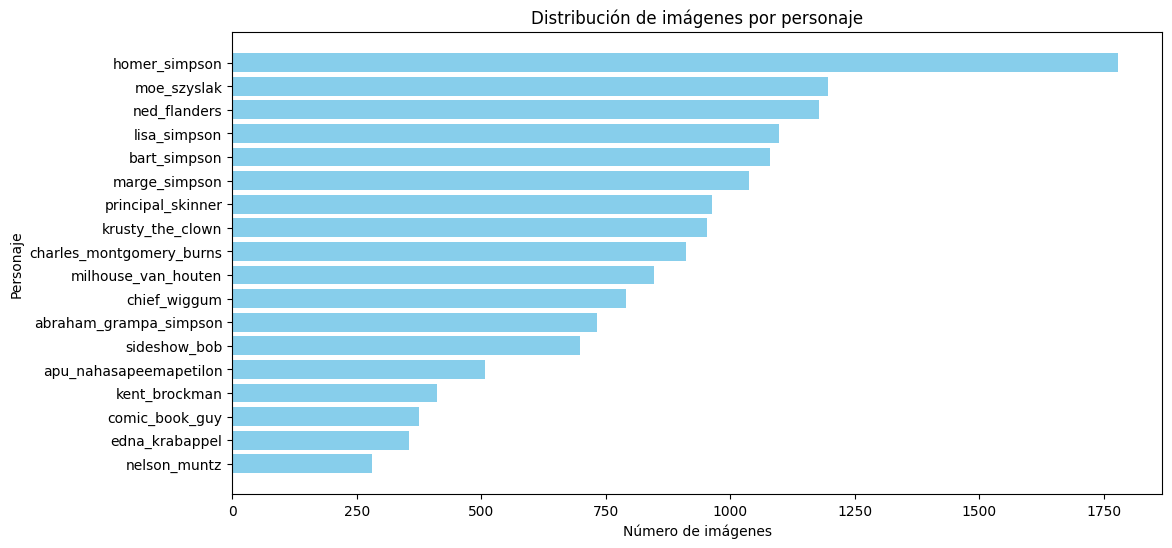

In [ ]:
class_counts = collections.Counter(y_train)

characters = [MAP_CHARACTERS[i] for i in class_counts.keys()]
counts = list(class_counts.values())

# Sort the characters and counts based on counts
sorted_indices = np.argsort(counts)[::-1]

characters = [characters[i] for i in sorted_indices]
counts = [counts[i] for i in sorted_indices]
# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.barh(characters, counts, color='skyblue')
plt.xlabel('Número de imágenes')
plt.ylabel('Personaje')
plt.title('Distribución de imágenes por personaje')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar el personaje con más imágenes en la parte superior
plt.show()

OBS: se puede esperar un sesgo significativo hacia las clases de los personajes de los simpsons que tienen una mayor cantidad de imagenes en la data de entrenamiento.

In [ ]:
# Normalización de las imágenes
# Normalizamos los valores de píxel de las imágenes de [0, 255] a [0, 1].
X_train_norm = X_train / 255.0
X_val_norm = X_val / 255.0
X_test_norm = X_test / 255.0

# Convierte los vectores de clase a matrices binarias de clase (one-hot encoding).
y_train_norm = keras.utils.to_categorical(y_train, num_categ)
y_val_norm  = keras.utils.to_categorical(y_val, num_categ)
y_test_norm  = keras.utils.to_categorical(y_test, num_categ)

print("Shape of X_train after normalization:", X_train.shape)
print("Shape of y_train after one-hot encoding:", y_train.shape)
print("Shape of X_val after normalization:", X_val.shape)
print("Shape of y_val after one-hot encoding:", y_val.shape)
print("Shape of X_test after normalization:", X_test.shape)
print("Shape of y_test after one-hot encoding:", y_test.shape)

Shape of X_train after normalization: (15193, 64, 64, 3)
Shape of y_train after one-hot encoding: (15193,)
Shape of X_val after normalization: (3799, 64, 64, 3)
Shape of y_val after one-hot encoding: (3799,)
Shape of X_test after normalization: (890, 64, 64, 3)
Shape of y_test after one-hot encoding: (890,)


# Funciones

Para la optimización del notebook se crean funciones las cuales agilizan el proceso de la creación de los modelos y mas adelante la evaluación de estos.

## Función creación y entrenamiento red convolucional

In [ ]:
def create_model(model_name,
                  X_train=X_train,
                  y_train=y_train,
                  X_val=X_val,
                  y_val=y_val,
                  X_test=X_test,
                  y_test=y_test,
                  input_dim=(64, 64, 3),
                  dict_conv={
                      'conv1': [32, 3, 3],
                      'conv2': [32, 3, 3],
                      'pool1': [2, 2],
                      'conv3': [64, 3, 3],
                      'conv4': [64, 3, 3],
                      'pool2': [2, 2]
                  },
                  dict_dense={'dense1': 256},
                  output_dim=18,
                  use_batchnorm=False,
                  use_dropout=False,
                  dropout_rate=0.5,
                  use_data_augmentation=False,
                  epocs = 15,
                  batch_size = 32):

    model = Sequential(name=model_name)

    # Capa de entrada
    model.add(Input(shape=input_dim, name="entrada"))

    # Data Augmentation (opcional)
    if use_data_augmentation:
        model.add(RandomFlip("horizontal", name="flip"))
        model.add(RandomRotation(0.1, name="rotation"))
        model.add(RandomZoom(0.1, name="zoom"))

    # Capas convolucionales y pooling
    for key in sorted(dict_conv.keys()):
        if key.startswith("conv"):
            filters, kernel_h, kernel_w = dict_conv[key]
            model.add(Conv2D(filters, (kernel_h, kernel_w), padding='same', activation='relu', name=key))
            if use_batchnorm:
                model.add(BatchNormalization(name=f"bn_{key}"))
        elif key.startswith("pool"):
            pool_h, pool_w = dict_conv[key]
            model.add(MaxPooling2D((pool_h, pool_w), name=f"pooling_{key[-1]}"))

    model.add(Flatten(name="flatten"))

    # Capas densas
    for key in sorted(dict_dense.keys()):
        units = dict_dense[key]
        model.add(Dense(units, activation='relu', name=key))
        if use_batchnorm:
            model.add(BatchNormalization(name=f"bn_{key}"))
        if use_dropout:
            model.add(Dropout(dropout_rate, name=f"dropout_{key}"))

    # Capa de salida
    model.add(Dense(output_dim, activation='softmax', name="output"))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    hist = model.fit(
        X_train,
        y_train,
        batch_size=batch_size,
        epochs=epocs,
        validation_data=(X_val,y_val)
    )

    return model, hist, model.evaluate(X_test, y_test), model.summary()




## Función para creación gráfico de rendimiento de red

In [ ]:
def graphs_hist(hist):
  plt.plot(hist.history['accuracy'], label='Accuracy_train')
  plt.plot(hist.history['val_accuracy'], label='Accuracy_val')
  plt.title('Comparación de rendimiento (validación)', fontsize=16, fontweight="bold")
  plt.xlabel('Épocas', fontsize=14, fontweight="bold")
  plt.ylabel('Accuracy', fontsize=14, fontweight="bold")
  plt.legend()
  plt.show()

## Función para generar data augmentation

In [ ]:
def augmentation_images(x ,y):
  class_counts = Counter(y)
  max_count = max(class_counts.values())

  # 2. Prepara el generador de imágenes
  datagen = ImageDataGenerator(
      # normalizacion
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest'
  )

  # 3. Crear listas para las nuevas imágenes aumentadas
  X_train_aug = list(x)
  y_train_aug = list(y)

  # 4. Genera imágenes aumentadas para clases con menos de max_count
  for label, count in class_counts.items():
      if count < max_count:
          print(f"▶ Generando imágenes para clase '{MAP_CHARACTERS[label]}'...")
          # Filtra imágenes de esta clase
          X_class = x[y == label]
          n_to_generate = max_count - count

          gen = datagen.flow(X_class, batch_size=1, shuffle=False)

          for _ in range(n_to_generate):
              augmented_image = next(gen)[0]
              X_train_aug.append(augmented_image)
              y_train_aug.append(label)

  # 5. Convertir listas a arrays numpy
  X_train_bal = np.array(X_train_aug)
  y_train_bal = np.array(y_train_aug)

  return X_train_bal, y_train_bal


# Definición de modelos

Incluir acá los modelos con los cuales se va a trabajar

## Modelo 1 - Primera CNN

Primero experimentaremos con una configuración simple de una red neuronal convolucional.Esta en particular tiene

Modelo con red convolucional de configuración:

Entrada:

    64 x 64 pixeles, 3 rgb

RED:

    - 2 conv 2D 64, (3, 3) con padding
    - 1 Maxpooling
    - 2 conv 2D 32, (3, 3) con padding
    - 1 Maxpooling

    Capa densa:
      - flatten
      - 256 neuronas

  

Salida:

    18 clases


In [ ]:
model1 = keras.Sequential(name="cnn1")

model1.add(Input(shape=(64, 64, 3), name="entrada"))
model1.add(Conv2D(64, (3, 3), padding='same', activation='relu', name="conv1"))
model1.add(Conv2D(64, (3, 3), activation='relu', name="conv2"))
model1.add(MaxPooling2D((2,2), name="pooling_1"))

model1.add(Conv2D(32, (3, 3), padding='same', activation='relu', name="conv3"))
model1.add(Conv2D(32, (3, 3), activation='relu', name="conv4"))
model1.add(MaxPooling2D((2,2), name="pooling_2"))

model1.add(Flatten(name="flatten_1"))
model1.add(Dense(256, activation='relu', name="dense1"))
model1.add(Dense(18, activation='softmax', name="output"))

model1.summary()

Model: "cnn1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 62, 62, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 31, 31, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_2 (MaxPooling2D)        │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 256)            │     1,605,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 18)             │         4,626 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,676,946 (6.40 MB)

 Trainable params: 1,676,946 (6.40 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model1.fit(
    X_train_norm,
    y_train_norm,
    batch_size=64,
    epochs=25,
    validation_data=(X_val_norm,y_val_norm)
)



Epoch 1/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.2527 - loss: 2.4131 - val_accuracy: 0.5559 - val_loss: 1.5072
Epoch 2/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.6198 - loss: 1.2796 - val_accuracy: 0.6936 - val_loss: 1.0601
Epoch 3/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.7822 - loss: 0.7398 - val_accuracy: 0.7434 - val_loss: 0.9007
Epoch 4/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.8877 - loss: 0.3968 - val_accuracy: 0.7710 - val_loss: 0.8525
Epoch 5/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9481 - loss: 0.1789 - val_accuracy: 0.7502 - val_loss: 1.1117
Epoch 6/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.9712 - loss: 0.0941 - val_accuracy: 0.7623 - val_loss: 1.2699
Epoch 7/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.9773 - loss: 0.0737 - val_accuracy: 0.7631 - val_loss: 1.4386
Epoch 8/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9845 - loss: 0.0510 - val

In [ ]:
 model1.evaluate(X_test_norm, y_test_norm)

28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9461 - loss: 0.3788


[0.36278486251831055, 0.9483146071434021]

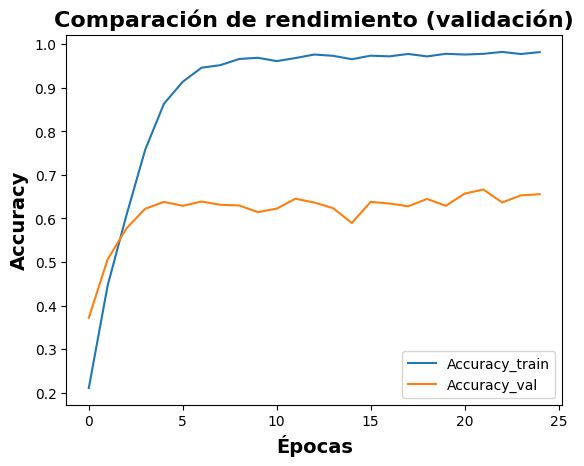

In [ ]:
graphs_hist(hist)

## Modelo 2 - Cambio en el orden de las capas convolucionales


Modelo con red neuronal convolucional de configuracion:

Entrada:

    64 x 64 pixeles, 3 rgb

RED:

    - 2 conv 2D 32, (3, 3) con padding
    - 1 Maxpooling
    - 2 conv 2D 64, (3, 3) con padding
    - 1 Maxpooling

    Capa densa:
      - flatten
      - 256 neuronas

  

Salida:

    18 clases

Iteraciones:

    epocs = 15
    batch_size = 32

In [ ]:
model2, hist2, eval2, summary2 = create_model('cnn2')

Epoch 1/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.1191 - loss: 9.3782 - val_accuracy: 0.1408 - val_loss: 2.6810
Epoch 2/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.2051 - loss: 2.5400 - val_accuracy: 0.3533 - val_loss: 2.1341
Epoch 3/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.4946 - loss: 1.6707 - val_accuracy: 0.5641 - val_loss: 1.5111
Epoch 4/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.7814 - loss: 0.7194 - val_accuracy: 0.6167 - val_loss: 1.5040
Epoch 5/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9241 - loss: 0.2622 - val_accuracy: 0.5909 - val_loss: 2.2357
Epoch 6/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9610 - loss: 0.1335 - val_accuracy: 0.6078 - val_loss: 2.6074
Epoch 7/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9616 - loss: 0.1308 - val_accuracy: 0.6244 - val_loss: 2.3142
Epoch 8/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9652 - loss: 0.1266 - val

Model: "cnn2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_2 (MaxPooling2D)        │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 256)            │     4,194,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 18)             │         4,626 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,794,264 (48.81 MB)

 Trainable params: 4,264,754 (16.27 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,529,510 (32.54 MB)

In [ ]:
eval2

[0.8231114149093628, 0.9033707976341248]

In [ ]:
summary2

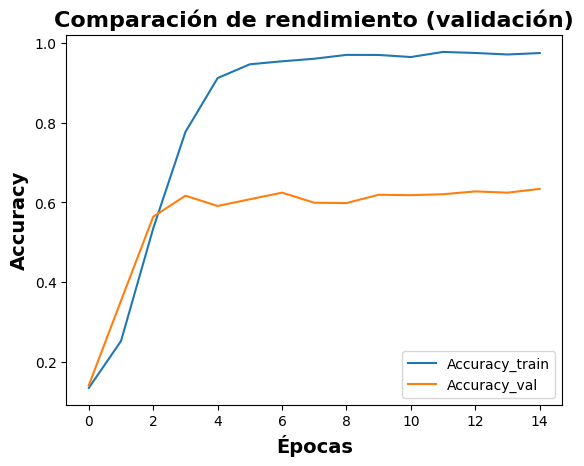

In [ ]:
## Grafico
graphs_hist(hist2)

## Modelo 3 - Capa de convolucion adicional

Agregamos mas capas a la convolución, conservando la estrategia de aumento de filtros por capa a medida que se van arreglando mas convoluciones.


Modelo con red neuronal convolucional de configuración:

Entrada:

    64 x 64 pixeles, 3 rgb

RED:

    - 2 conv 2D 32, (3, 3) con padding
    - 1 Maxpooling
    - 2 conv 2D 64, (3, 3) con padding
    - 1 Maxpooling
    - 2 conv 2D 128, (3, 3) con padding
    - 1 Maxpooling

    Capa densa:
      - flatten
      - 256 neuronas

  

Salida:

    18 clases

Iteraciones:

    epocs = 15
    batch_size = 32

In [ ]:
model3, hist3, eval3, summary3 = create_model('cnn3',
                  X_train=X_train,
                  y_train=y_train,
                  X_val=X_val,
                  y_val=y_val,
                  X_test=X_test,
                  y_test=y_test,
                  input_dim=(64, 64, 3),
                  dict_conv={
                      'conv1': [32, 3, 3],
                      'conv2': [32, 3, 3],
                      'pool1': [2, 2],
                      'conv3': [64, 3, 3],
                      'conv4': [64, 3, 3],
                      'pool2': [2, 2],
                      'conv5': [128, 3, 3],
                      'conv6': [128, 3, 3],
                      'pool3': [2, 2]
                  },
                  dict_dense={'dense1': 256},
                  output_dim=18,
                  use_batchnorm=False,
                  use_dropout=False,
                  dropout_rate=0.5,
                  use_data_augmentation=False,
                  epocs = 15,
                  batch_size = 32)

Epoch 1/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 39s 68ms/step - accuracy: 0.1269 - loss: 3.6357 - val_accuracy: 0.2893 - val_loss: 2.2819
Epoch 2/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 28s 51ms/step - accuracy: 0.3251 - loss: 2.1606 - val_accuracy: 0.4475 - val_loss: 1.7985
Epoch 3/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.5137 - loss: 1.5884 - val_accuracy: 0.5259 - val_loss: 1.5443
Epoch 4/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.6317 - loss: 1.2159 - val_accuracy: 0.6188 - val_loss: 1.3373
Epoch 5/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - accuracy: 0.7645 - loss: 0.7707 - val_accuracy: 0.6625 - val_loss: 1.2482
Epoch 6/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.8338 - loss: 0.5234 - val_accuracy: 0.6499 - val_loss: 1.5154
Epoch 7/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.8937 - loss: 0.3445 - val_accuracy: 0.7004 - val_loss: 1.4201
Epoch 8/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 24s 50ms/step - accuracy: 0.9181 - loss: 0.2579 - 

Model: "cnn3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv5 (Conv2D)                  │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv6 (Conv2D)                  │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_2 (MaxPooling2D)        │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_3 (MaxPooling2D)        │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 18)             │         4,626 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,167,128 (27.34 MB)

 Trainable params: 2,389,042 (9.11 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,778,086 (18.23 MB)

In [ ]:
model3.evaluate(X_test, y_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9229 - loss: 0.5683


[0.5722797513008118, 0.9146067500114441]

In [ ]:
model3.summary()

Model: "cnn3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv5 (Conv2D)                  │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv6 (Conv2D)                  │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_2 (MaxPooling2D)        │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_3 (MaxPooling2D)        │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 18)             │         4,626 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,167,128 (27.34 MB)

 Trainable params: 2,389,042 (9.11 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,778,086 (18.23 MB)

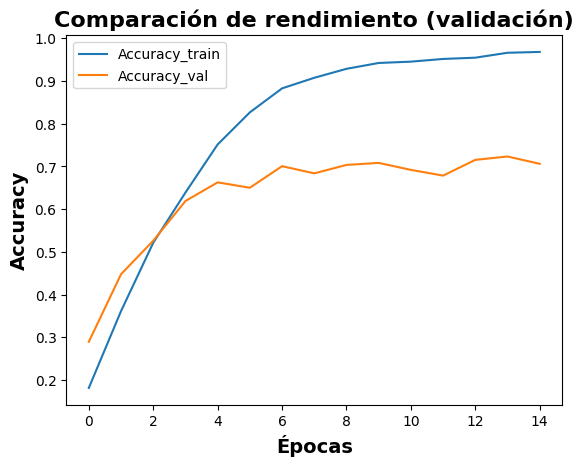

In [ ]:
## Grafico
graphs_hist(hist3)

## Modelo 4 - Cambios en capas densas

Agregamos mas capas a las capas densas, en especifico una capa adicional.

Modelo con red neuronal convolucional de configuración:

Entrada:

    64 x 64 pixeles, 3 rgb

RED:

    - 2 conv 2D 32, (3, 3) con padding
    - 1 Maxpooling
    - 2 conv 2D 64, (3, 3) con padding
    - 1 Maxpooling
    - 2 conv 2D 128, (3, 3) con padding
    - 1 Maxpooling

    Capa densa:
      - flatten
      - 256 neuronas
      - 128 neuronas

  

Salida:

    18 clases

Iteraciones:

    epocs = 15
    batch_size = 32

In [ ]:
model4, hist4, eval4, summary4 = create_model('cnn4',
                  X_train=X_train,
                  y_train=y_train,
                  X_val=X_val,
                  y_val=y_val,
                  X_test=X_test,
                  y_test=y_test,
                  input_dim=(64, 64, 3),
                  dict_conv={
                      'conv1': [32, 3, 3],
                      'conv2': [32, 3, 3],
                      'pool1': [2, 2],
                      'conv3': [64, 3, 3],
                      'conv4': [64, 3, 3],
                      'pool2': [2, 2],
                      'conv5': [128, 3, 3],
                      'conv6': [128, 3, 3],
                      'pool3': [2, 2]
                  },
                  dict_dense={'dense1': 256, 'dense2': 128},
                  output_dim=18,
                  use_batchnorm=False,
                  use_dropout=False,
                  dropout_rate=0.5,
                  use_data_augmentation=False,
                  epocs = 15,
                  batch_size = 32)

Epoch 1/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 31s 56ms/step - accuracy: 0.1431 - loss: 3.0026 - val_accuracy: 0.4146 - val_loss: 1.9684
Epoch 2/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.4880 - loss: 1.6995 - val_accuracy: 0.6125 - val_loss: 1.3211
Epoch 3/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.6525 - loss: 1.1452 - val_accuracy: 0.6852 - val_loss: 1.0434
Epoch 4/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accuracy: 0.7742 - loss: 0.7408 - val_accuracy: 0.7381 - val_loss: 0.9208
Epoch 5/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.8486 - loss: 0.4828 - val_accuracy: 0.7507 - val_loss: 0.9552
Epoch 6/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accuracy: 0.8817 - loss: 0.3635 - val_accuracy: 0.7560 - val_loss: 0.9485
Epoch 7/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.9212 - loss: 0.2438 - val_accuracy: 0.7718 - val_loss: 0.9851
Epoch 8/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accuracy: 0.9354 - loss: 0.2184 - 

Model: "cnn4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv5 (Conv2D)                  │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv6 (Conv2D)                  │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_2 (MaxPooling2D)        │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_3 (MaxPooling2D)        │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 18)             │         2,322 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,258,904 (27.69 MB)

 Trainable params: 2,419,634 (9.23 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,839,270 (18.46 MB)

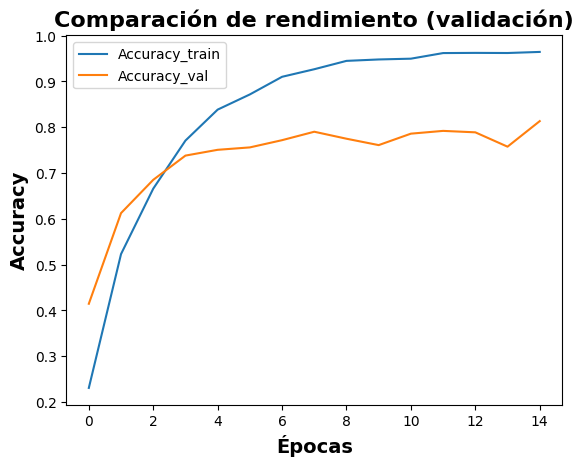

In [ ]:
## Grafico
graphs_hist(hist4)

## Modelo 5  - Se agregan capas de dropout

Se agregaran capas de dropout en las capas internas fully connected, con un valor de dropout de 0.5.


Agregamos mas capas a las capas densas, en especifico una capa adicional.

Modelo con red neuronal convolucional de configuración:

Entrada:

    64 x 64 pixeles, 3 rgb

RED:

    - 2 conv 2D 32, (3, 3) con padding
    - 1 Maxpooling
    - 2 conv 2D 64, (3, 3) con padding
    - 1 Maxpooling
    - 2 conv 2D 128, (3, 3) con padding
    - 1 Maxpooling

    Capa densa:
      - flatten
      - 256 neuronas
      - dropout 0.5
      - 128 neuronas
      - dropout 0.5


Salida:

    18 clases

Iteraciones:

    epocs = 15
    batch_size = 32


In [ ]:
model5, hist5, eval5, summary5 = create_model('cnn5',
                  X_train=X_train,
                  y_train=y_train,
                  X_val=X_val,
                  y_val=y_val,
                  X_test=X_test,
                  y_test=y_test,
                  input_dim=(64, 64, 3),
                  dict_conv={
                      'conv1': [32, 3, 3],
                      'conv2': [32, 3, 3],
                      'pool1': [2, 2],
                      'conv3': [64, 3, 3],
                      'conv4': [64, 3, 3],
                      'pool2': [2, 2],
                      'conv5': [128, 3, 3],
                      'conv6': [128, 3, 3],
                      'pool3': [2, 2]
                  },
                  dict_dense={'dense1': 256, 'dense2': 128},
                  output_dim=18,
                  use_batchnorm=False,
                  use_dropout=True,
                  dropout_rate=0.5,
                  use_data_augmentation=False,
                  epocs = 15,
                  batch_size = 32)

Epoch 1/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 33s 58ms/step - accuracy: 0.1050 - loss: 3.4579 - val_accuracy: 0.1743 - val_loss: 2.5669
Epoch 2/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - accuracy: 0.2018 - loss: 2.5334 - val_accuracy: 0.2732 - val_loss: 2.2670
Epoch 3/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 25s 52ms/step - accuracy: 0.2951 - loss: 2.2171 - val_accuracy: 0.4312 - val_loss: 1.8389
Epoch 4/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 24s 50ms/step - accuracy: 0.4287 - loss: 1.8577 - val_accuracy: 0.5233 - val_loss: 1.5308
Epoch 5/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.5327 - loss: 1.5390 - val_accuracy: 0.6044 - val_loss: 1.3250
Epoch 6/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.5875 - loss: 1.3520 - val_accuracy: 0.6573 - val_loss: 1.1475
Epoch 7/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.6405 - loss: 1.1710 - val_accuracy: 0.6923 - val_loss: 1.0452
Epoch 8/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - accuracy: 0.6886 - loss: 1.0500 - 

Model: "cnn5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv5 (Conv2D)                  │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv6 (Conv2D)                  │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_2 (MaxPooling2D)        │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_3 (MaxPooling2D)        │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_dense1 (Dropout)        │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_dense2 (Dropout)        │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 18)             │         2,322 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,258,904 (27.69 MB)

 Trainable params: 2,419,634 (9.23 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,839,270 (18.46 MB)

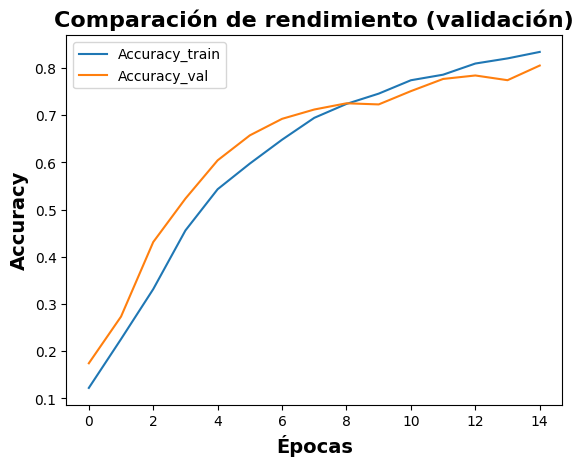

In [ ]:
## Grafico
graphs_hist(hist5)

## Modelo 6

Valor menor en dropout

Se agregaran capas de dropout en las capas internas fully connected, con un valor de dropout de 0.5.


Agregamos mas capas a las capas densas, en especifico una capa adicional.

Modelo con red neuronal convolucional de configuración:

Entrada:

    64 x 64 pixeles, 3 rgb

RED:

    - 2 conv 2D 32, (3, 3) con padding
    - 1 Maxpooling
    - 2 conv 2D 64, (3, 3) con padding
    - 1 Maxpooling
    - 2 conv 2D 128, (3, 3) con padding
    - 1 Maxpooling

    Capa densa:
      - flatten
      - 256 neuronas
      - dropout 0.3
      - 128 neuronas
      - dropout 0.3


Salida:

    18 clases

Iteraciones:

    epocs = 15
    batch_size = 32


In [ ]:
model6, hist6, eval6, summary6 = create_model('cnn6',
                  X_train=X_train,
                  y_train=y_train,
                  X_val=X_val,
                  y_val=y_val,
                  X_test=X_test,
                  y_test=y_test,
                  input_dim=(64, 64, 3),
                  dict_conv={
                      'conv1': [32, 3, 3],
                      'conv2': [32, 3, 3],
                      'pool1': [2, 2],
                      'conv3': [64, 3, 3],
                      'conv4': [64, 3, 3],
                      'pool2': [2, 2],
                      'conv5': [128, 3, 3],
                      'conv6': [128, 3, 3],
                      'pool3': [2, 2]
                  },
                  dict_dense={'dense1': 256, 'dense2': 128},
                  output_dim=18,
                  use_batchnorm=False,
                  use_dropout=True,
                  dropout_rate=0.3,
                  use_data_augmentation=False,
                  epocs = 15,
                  batch_size = 32)

Epoch 1/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 32s 58ms/step - accuracy: 0.1100 - loss: 3.2735 - val_accuracy: 0.2443 - val_loss: 2.4047
Epoch 2/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 36s 52ms/step - accuracy: 0.2776 - loss: 2.2970 - val_accuracy: 0.3930 - val_loss: 1.9667
Epoch 3/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 24s 50ms/step - accuracy: 0.4165 - loss: 1.9161 - val_accuracy: 0.4785 - val_loss: 1.7230
Epoch 4/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accuracy: 0.5218 - loss: 1.5752 - val_accuracy: 0.5746 - val_loss: 1.4201
Epoch 5/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.6071 - loss: 1.2802 - val_accuracy: 0.6225 - val_loss: 1.2361
Epoch 6/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.6693 - loss: 1.0740 - val_accuracy: 0.6662 - val_loss: 1.1333
Epoch 7/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 24s 50ms/step - accuracy: 0.7222 - loss: 0.9209 - val_accuracy: 0.6931 - val_loss: 1.0602
Epoch 8/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 24s 50ms/step - accuracy: 0.7683 - loss: 0.7489 - 

Model: "cnn6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv5 (Conv2D)                  │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv6 (Conv2D)                  │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_2 (MaxPooling2D)        │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_3 (MaxPooling2D)        │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_dense1 (Dropout)        │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_dense2 (Dropout)        │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 18)             │         2,322 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,258,904 (27.69 MB)

 Trainable params: 2,419,634 (9.23 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,839,270 (18.46 MB)

In [ ]:
eval6

[0.34341856837272644, 0.9213483333587646]

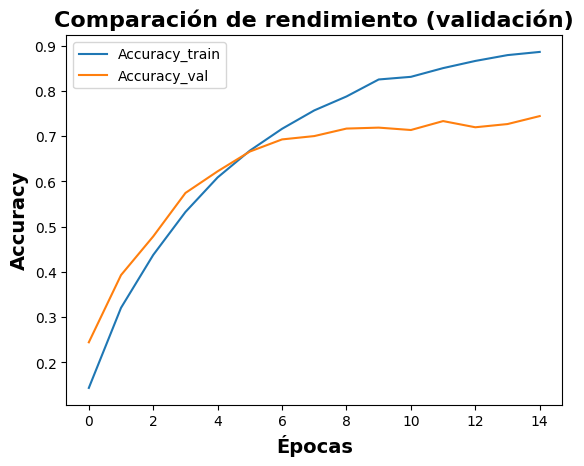

In [ ]:
## Grafico
graphs_hist(hist6)

## Modelo 7

Con batch normalization.

Modelo con red neuronal convolucional de configuración:

Entrada:

    64 x 64 pixeles, 3 rgb

RED:

    - 2 conv 2D 32, (3, 3) con padding
    - BatchNormalization
    - 1 Maxpooling
    - 2 conv 2D 64, (3, 3) con padding
    - BatchNormalization
    - 1 Maxpooling
    - 2 conv 2D 128, (3, 3) con padding
    - BatchNormalization
    - 1 Maxpooling

    Capa densa:
      - flatten
      - 256 neuronas
      - dropout 0.3
      - BatchNormalization
      - 128 neuronas
      - dropout 0.3
      - BatchNormalization


Salida:

    18 clases

Iteraciones:

    epocs = 15
    batch_size = 32


In [ ]:
model7, hist7, eval7, summary7 = create_model('cnn7',
                  X_train=X_train,
                  y_train=y_train,
                  X_val=X_val,
                  y_val=y_val,
                  X_test=X_test,
                  y_test=y_test,
                  input_dim=(64, 64, 3),
                  dict_conv={
                      'conv1': [32, 3, 3],
                      'conv2': [32, 3, 3],
                      'pool1': [2, 2],
                      'conv3': [64, 3, 3],
                      'conv4': [64, 3, 3],
                      'pool2': [2, 2],
                      'conv5': [128, 3, 3],
                      'conv6': [128, 3, 3],
                      'pool3': [2, 2]
                  },
                  dict_dense={'dense1': 256, 'dense2': 128},
                  output_dim=18,
                  use_batchnorm=True,
                  use_dropout=True,
                  dropout_rate=0.3,
                  use_data_augmentation=False,
                  epocs = 15,
                  batch_size = 32)

Epoch 1/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.3066 - loss: 2.5050 - val_accuracy: 0.6144 - val_loss: 1.3123
Epoch 2/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 28s 59ms/step - accuracy: 0.6516 - loss: 1.1636 - val_accuracy: 0.6015 - val_loss: 1.5426
Epoch 3/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 41s 58ms/step - accuracy: 0.7345 - loss: 0.8814 - val_accuracy: 0.7760 - val_loss: 0.7735
Epoch 4/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 41s 58ms/step - accuracy: 0.8172 - loss: 0.6117 - val_accuracy: 0.7805 - val_loss: 0.7824
Epoch 5/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 42s 59ms/step - accuracy: 0.8537 - loss: 0.4810 - val_accuracy: 0.8450 - val_loss: 0.5387
Epoch 6/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 40s 58ms/step - accuracy: 0.8947 - loss: 0.3548 - val_accuracy: 0.8405 - val_loss: 0.5477
Epoch 7/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 42s 59ms/step - accuracy: 0.9115 - loss: 0.2977 - val_accuracy: 0.8347 - val_loss: 0.6102
Epoch 8/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 40s 58ms/step - accuracy: 0.9231 - loss: 0.2468 - 

Model: "cnn7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_conv1 (BatchNormalization)   │ (None, 64, 64, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_conv2 (BatchNormalization)   │ (None, 64, 64, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_conv3 (BatchNormalization)   │ (None, 64, 64, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_conv4 (BatchNormalization)   │ (None, 64, 64, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv5 (Conv2D)                  │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_conv5 (BatchNormalization)   │ (None, 64, 64, 128)    │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv6 (Conv2D)                  │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_conv6 (BatchNormalization)   │ (None, 64, 64, 128)    │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_2 (MaxPooling2D)        │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_3 (MaxPooling2D)        │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_dense1 (BatchNormalization)  │ (None, 256)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_dense1 (Dropout)        │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_dense2 (BatchNormalization)  │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_dense2 (Dropout)        │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 18)             │         2,322 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,265,560 (27.72 MB)

 Trainable params: 2,421,298 (9.24 MB)

 Non-trainable params: 1,664 (6.50 KB)

 Optimizer params: 4,842,598 (18.47 MB)

In [ ]:
eval7

[0.16844971477985382, 0.9595505595207214]

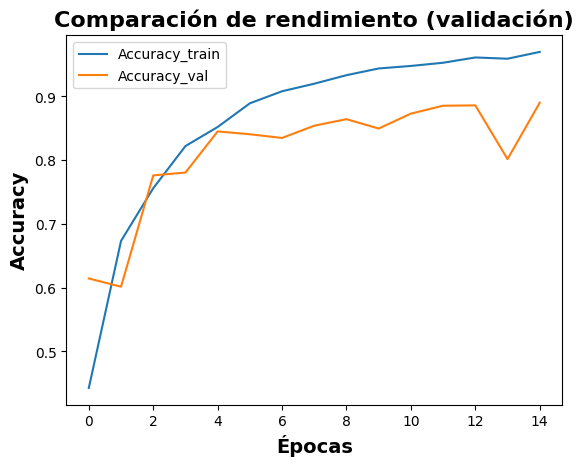

In [ ]:
## Grafico
graphs_hist(hist7)

## Modelo 8 - Data Augmentation

Modelo con red neuronal convolucional de configuración:

Entrada:

    64 x 64 pixeles, 3 rgb
    - flip
    - rotation
    - zoom

RED:

    - 2 conv 2D 32, (3, 3) con padding
    - BatchNormalization
    - 1 Maxpooling
    - 2 conv 2D 64, (3, 3) con padding
    - BatchNormalization
    - 1 Maxpooling
    - 2 conv 2D 128, (3, 3) con padding
    - BatchNormalization
    - 1 Maxpooling

    Capa densa:
      - flatten
      - 256 neuronas
      - dropout 0.3
      - BatchNormalization
      - 128 neuronas
      - dropout 0.3
      - BatchNormalization


Salida:

    18 clases

Iteraciones:

    epocs = 15
    batch_size = 32


In [ ]:
model8, hist8, eval8, summary8 = create_model('cnn8',
                  X_train=X_train,
                  y_train=y_train,
                  X_val=X_val,
                  y_val=y_val,
                  X_test=X_test,
                  y_test=y_test,
                  input_dim=(64, 64, 3),
                  dict_conv={
                      'conv1': [32, 3, 3],
                      'conv2': [32, 3, 3],
                      'pool1': [2, 2],
                      'conv3': [64, 3, 3],
                      'conv4': [64, 3, 3],
                      'pool2': [2, 2],
                      'conv5': [128, 3, 3],
                      'conv6': [128, 3, 3],
                      'pool3': [2, 2]
                  },
                  dict_dense={'dense1': 256, 'dense2': 128},
                  output_dim=18,
                  use_batchnorm=True,
                  use_dropout=True,
                  dropout_rate=0.3,
                  use_data_augmentation=True,
                  epocs = 15,
                  batch_size = 32)

Epoch 1/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 55s 102ms/step - accuracy: 0.2822 - loss: 2.5952 - val_accuracy: 0.5981 - val_loss: 1.4514
Epoch 2/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 80s 97ms/step - accuracy: 0.5673 - loss: 1.4348 - val_accuracy: 0.6581 - val_loss: 1.1560
Epoch 3/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 46s 97ms/step - accuracy: 0.6650 - loss: 1.1148 - val_accuracy: 0.7015 - val_loss: 1.0609
Epoch 4/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 82s 98ms/step - accuracy: 0.7245 - loss: 0.9200 - val_accuracy: 0.7818 - val_loss: 0.7465
Epoch 5/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 81s 97ms/step - accuracy: 0.7538 - loss: 0.8116 - val_accuracy: 0.7944 - val_loss: 0.7281
Epoch 6/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 46s 98ms/step - accuracy: 0.8009 - loss: 0.6722 - val_accuracy: 0.7412 - val_loss: 0.9740
Epoch 7/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 82s 97ms/step - accuracy: 0.8273 - loss: 0.5875 - val_accuracy: 0.7547 - val_loss: 0.8884
Epoch 8/15
475/475 ━━━━━━━━━━━━━━━━━━━━ 82s 97ms/step - accuracy: 0.8366 - loss: 0.5518 -

Model: "cnn8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flip (RandomFlip)               │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rotation (RandomRotation)       │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zoom (RandomZoom)               │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_conv1 (BatchNormalization)   │ (None, 64, 64, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_conv2 (BatchNormalization)   │ (None, 64, 64, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_conv3 (BatchNormalization)   │ (None, 64, 64, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_conv4 (BatchNormalization)   │ (None, 64, 64, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv5 (Conv2D)                  │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_conv5 (BatchNormalization)   │ (None, 64, 64, 128)    │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv6 (Conv2D)                  │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_conv6 (BatchNormalization)   │ (None, 64, 64, 128)    │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_2 (MaxPooling2D)        │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_3 (MaxPooling2D)        │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_dense1 (BatchNormalization)  │ (None, 256)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_dense1 (Dropout)        │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_dense2 (BatchNormalization)  │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_dense2 (Dropout)        │ (None, 128)            │             

 Total params: 7,265,560 (27.72 MB)

 Trainable params: 2,421,298 (9.24 MB)

 Non-trainable params: 1,664 (6.50 KB)

 Optimizer params: 4,842,598 (18.47 MB)

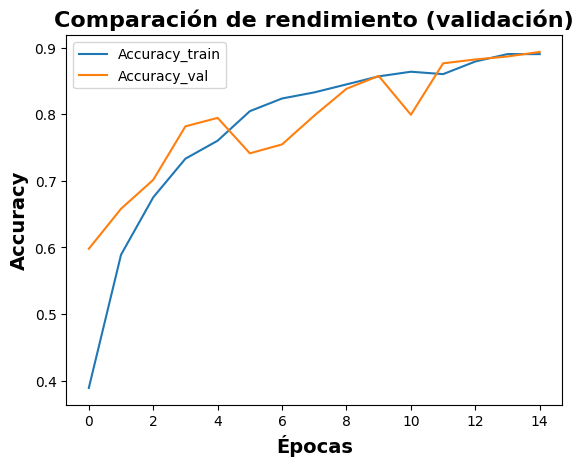

In [ ]:
## Grafico
graphs_hist(hist8)

## Modelo 9

Modelo con red neuronal convolucional de configuración:

Entrada:

    64 x 64 pixeles, 3 rgb
    - flip
    - rotation
    - zoom

RED:

    - 2 conv 2D 32, (3, 3) con padding
    - BatchNormalization
    - 1 Maxpooling
    - 2 conv 2D 64, (3, 3) con padding
    - BatchNormalization
    - 1 Maxpooling
    - 2 conv 2D 128, (3, 3) con padding
    - BatchNormalization
    - 1 Maxpooling

    Capa densa:
      - flatten
      - 256 neuronas
      - dropout 0.3
      - BatchNormalization
      - 128 neuronas
      - dropout 0.3
      - BatchNormalization
      - 64 neuronas
      - dropout 0.3
      - BatchNormalization

Salida:

    18 clases

Iteraciones:

    epocs = 15
    batch_size = 32


In [ ]:
model9, hist9, eval9, summary9 = create_model('cnn9',
                  X_train=X_train,
                  y_train=y_train,
                  X_val=X_val,
                  y_val=y_val,
                  X_test=X_test,
                  y_test=y_test,
                  input_dim=(64, 64, 3),
                  dict_conv={
                      'conv1': [32, 3, 3],
                      'conv2': [32, 3, 3],
                      'pool1': [2, 2],
                      'conv3': [64, 3, 3],
                      'conv4': [64, 3, 3],
                      'pool2': [2, 2],
                      'conv5': [128, 3, 3],
                      'conv6': [128, 3, 3],
                      'pool3': [2, 2]
                  },
                  dict_dense={'dense1': 256, 'dense2': 128, 'dense3': 64},
                  output_dim=18,
                  use_batchnorm=True,
                  use_dropout=True,
                  dropout_rate=0.3,
                  use_data_augmentation=True,
                  epocs = 20,
                  batch_size = 32)

Epoch 1/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 54s 100ms/step - accuracy: 0.1854 - loss: 2.9703 - val_accuracy: 0.5201 - val_loss: 1.6740
Epoch 2/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 47s 98ms/step - accuracy: 0.4833 - loss: 1.7064 - val_accuracy: 0.5064 - val_loss: 1.6843
Epoch 3/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 82s 99ms/step - accuracy: 0.5984 - loss: 1.3553 - val_accuracy: 0.7278 - val_loss: 0.9199
Epoch 4/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 82s 99ms/step - accuracy: 0.6703 - loss: 1.1172 - val_accuracy: 0.7315 - val_loss: 0.9512
Epoch 5/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 82s 98ms/step - accuracy: 0.7259 - loss: 0.9390 - val_accuracy: 0.7844 - val_loss: 0.7294
Epoch 6/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 82s 98ms/step - accuracy: 0.7612 - loss: 0.8120 - val_accuracy: 0.7834 - val_loss: 0.7491
Epoch 7/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 82s 99ms/step - accuracy: 0.7864 - loss: 0.7362 - val_accuracy: 0.7218 - val_loss: 0.9603
Epoch 8/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 82s 99ms/step - accuracy: 0.7925 - loss: 0.7027 -

Model: "cnn9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flip (RandomFlip)               │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rotation (RandomRotation)       │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zoom (RandomZoom)               │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_conv1 (BatchNormalization)   │ (None, 64, 64, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_conv2 (BatchNormalization)   │ (None, 64, 64, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_conv3 (BatchNormalization)   │ (None, 64, 64, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_conv4 (BatchNormalization)   │ (None, 64, 64, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv5 (Conv2D)                  │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_conv5 (BatchNormalization)   │ (None, 64, 64, 128)    │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv6 (Conv2D)                  │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_conv6 (BatchNormalization)   │ (None, 64, 64, 128)    │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_2 (MaxPooling2D)        │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_3 (MaxPooling2D)        │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_dense1 (BatchNormalization)  │ (None, 256)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_dense1 (Dropout)        │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_dense2 (BatchNormalization)  │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_dense2 (Dropout)        │ (None, 128)            │             

 Total params: 7,287,384 (27.80 MB)

 Trainable params: 2,428,530 (9.26 MB)

 Non-trainable params: 1,792 (7.00 KB)

 Optimizer params: 4,857,062 (18.53 MB)

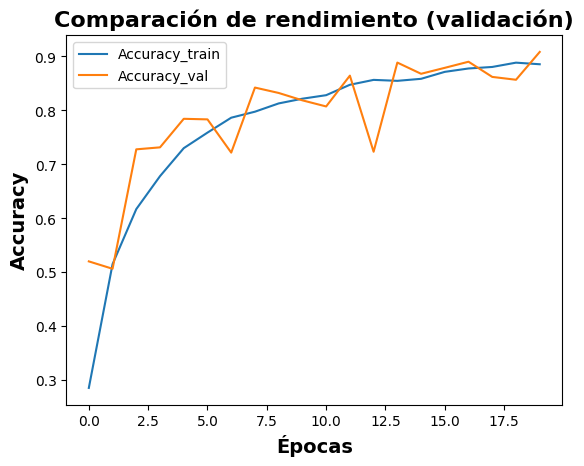

In [ ]:
## Grafico
graphs_hist(hist9)

## Modelo 10 - Data Augmentation mejorada

Modelo con red neuronal convolucional de configuración:

Entrada:

    64 x 64 pixeles, 3 rgb
    - flip
    - rotation
    - zoom

RED:

    - 2 conv 2D 32, (3, 3) con padding
    - BatchNormalization
    - 1 Maxpooling
    - 2 conv 2D 64, (3, 3) con padding
    - BatchNormalization
    - 1 Maxpooling
    - 2 conv 2D 128, (3, 3) con padding
    - BatchNormalization
    - 1 Maxpooling

    Capa densa:
      - flatten
      - 256 neuronas
      - dropout 0.3
      - BatchNormalization
      - 128 neuronas
      - dropout 0.3
      - BatchNormalization
      - 64 neuronas
      - dropout 0.3
      - BatchNormalization

Salida:

    18 clases

Iteraciones:

    epocs = 15
    batch_size = 32


In [ ]:
X_train_aug, y_train_aug = augmentation_images(X_train, y_train)
X_val_aug, y_val_aug = augmentation_images(X_val, y_val)

▶ Generando imágenes para clase 'apu_nahasapeemapetilon'...
▶ Generando imágenes para clase 'marge_simpson'...
▶ Generando imágenes para clase 'sideshow_bob'...
▶ Generando imágenes para clase 'bart_simpson'...
▶ Generando imágenes para clase 'moe_szyslak'...
▶ Generando imágenes para clase 'charles_montgomery_burns'...
▶ Generando imágenes para clase 'ned_flanders'...
▶ Generando imágenes para clase 'principal_skinner'...
▶ Generando imágenes para clase 'abraham_grampa_simpson'...
▶ Generando imágenes para clase 'lisa_simpson'...
▶ Generando imágenes para clase 'nelson_muntz'...
▶ Generando imágenes para clase 'chief_wiggum'...
▶ Generando imágenes para clase 'krusty_the_clown'...
▶ Generando imágenes para clase 'milhouse_van_houten'...
▶ Generando imágenes para clase 'comic_book_guy'...
▶ Generando imágenes para clase 'edna_krabappel'...
▶ Generando imágenes para clase 'kent_brockman'...
▶ Generando imágenes para clase 'chief_wiggum'...
▶ Generando imágenes para clase 'bart_simpson'.

In [ ]:
y_train_aug = keras.utils.to_categorical(y_train_aug, num_categ)
y_val_aug = keras.utils.to_categorical(y_val_aug, num_categ)

In [ ]:
model10, hist10, eval10, summary10 = create_model('cnn10',
                  X_train=X_train_aug,
                  y_train=y_train_aug,
                  X_val=X_val_aug,
                  y_val=y_val_aug,
                  X_test=X_test,
                  y_test=y_test,
                  input_dim=(64, 64, 3),
                  dict_conv={
                      'conv1': [32, 3, 3],
                      'conv2': [32, 3, 3],
                      'pool1': [2, 2],
                      'conv3': [64, 3, 3],
                      'conv4': [64, 3, 3],
                      'pool2': [2, 2],
                      'conv5': [128, 3, 3],
                      'conv6': [128, 3, 3],
                      'pool3': [2, 2]
                  },
                  dict_dense={'dense1': 256, 'dense2': 128, 'dense3': 64},
                  output_dim=18,
                  use_batchnorm=True,
                  use_dropout=True,
                  dropout_rate=0.3,
                  use_data_augmentation=True,
                  epocs = 20,
                  batch_size = 32)

Epoch 1/20
1007/1007 ━━━━━━━━━━━━━━━━━━━━ 125s 111ms/step - accuracy: 0.2629 - loss: 2.5811 - val_accuracy: 0.5135 - val_loss: 1.6765
Epoch 2/20
1007/1007 ━━━━━━━━━━━━━━━━━━━━ 115s 114ms/step - accuracy: 0.5842 - loss: 1.4000 - val_accuracy: 0.5889 - val_loss: 1.4019
Epoch 3/20
1007/1007 ━━━━━━━━━━━━━━━━━━━━ 141s 114ms/step - accuracy: 0.6678 - loss: 1.1078 - val_accuracy: 0.7284 - val_loss: 0.9151
Epoch 4/20
1007/1007 ━━━━━━━━━━━━━━━━━━━━ 141s 113ms/step - accuracy: 0.7379 - loss: 0.8899 - val_accuracy: 0.8041 - val_loss: 0.6697
Epoch 5/20
1007/1007 ━━━━━━━━━━━━━━━━━━━━ 115s 114ms/step - accuracy: 0.7775 - loss: 0.7537 - val_accuracy: 0.8378 - val_loss: 0.5753
Epoch 6/20
1007/1007 ━━━━━━━━━━━━━━━━━━━━ 110s 109ms/step - accuracy: 0.8110 - loss: 0.6495 - val_accuracy: 0.8158 - val_loss: 0.6410
Epoch 7/20
1007/1007 ━━━━━━━━━━━━━━━━━━━━ 145s 112ms/step - accuracy: 0.8401 - loss: 0.5551 - val_accuracy: 0.8408 - val_loss: 0.5365
Epoch 8/20
1007/1007 ━━━━━━━━━━━━━━━━━━━━ 139s 109ms/step - ac

Model: "cnn10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flip (RandomFlip)               │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rotation (RandomRotation)       │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zoom (RandomZoom)               │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_conv1 (BatchNormalization)   │ (None, 64, 64, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_conv2 (BatchNormalization)   │ (None, 64, 64, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_conv3 (BatchNormalization)   │ (None, 64, 64, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_conv4 (BatchNormalization)   │ (None, 64, 64, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv5 (Conv2D)                  │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_conv5 (BatchNormalization)   │ (None, 64, 64, 128)    │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv6 (Conv2D)                  │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_conv6 (BatchNormalization)   │ (None, 64, 64, 128)    │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_2 (MaxPooling2D)        │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_3 (MaxPooling2D)        │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_dense1 (BatchNormalization)  │ (None, 256)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_dense1 (Dropout)        │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_dense2 (BatchNormalization)  │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_dense2 (Dropout)        │ (None, 128)            │             

 Total params: 7,287,384 (27.80 MB)

 Trainable params: 2,428,530 (9.26 MB)

 Non-trainable params: 1,792 (7.00 KB)

 Optimizer params: 4,857,062 (18.53 MB)

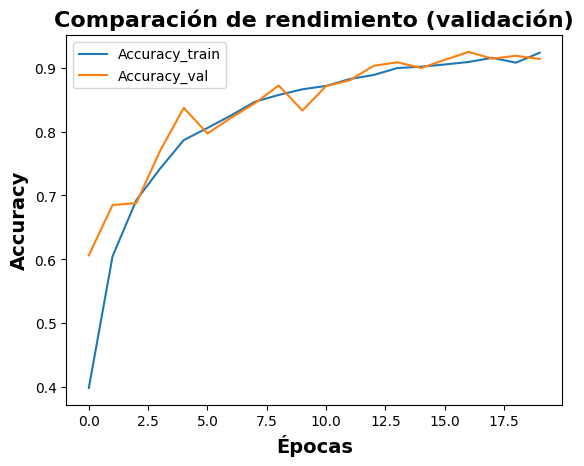

In [ ]:
## Grafico
graphs_hist(hist10)

# Analisis del rendimiento de los modelos

A medida que los modelos se entrenan obtenemos la metrica de accuracy de train as cual nos da indicativos que lo modelos clasifican generalmente bien, sin embargo si la comparamos con el accuracy de validation, se evidencia el overfitting que hay en los modelos y esto sucede en la mayoria de estos, las exepciones son en las que se aplican modelos con dataset ya balanceadas. Se aplicaron distintas tecnicas para mejorar la correcta generalización de los modelos, y en ciertos casos se evidencia un incremento en el rendimiento de los modelos, en este caso se habla sobre el modelo con dropout y el aumento de las capas ocultas, pero se debe tener en cuenta el overfitting que se evidencia, otras tecnicas seria el batchNormalization que tambien incremento el rendimiento del los modelos aplicados con esta tecnica.  
Sobre las capas convolucionales aplicamos distintas arquitecturas para cierta cantidad de los modelos, esto debido a las complejidad que tienen las imagenes, considerando las imagenes, gran parte de estas son imagenes que estan cortadas por lo cual los personajes se encuentran en distintas partes de las imagenes, ademas en algunas imagenes aparecen mas de un personaje, con la cantidad de capas convoluciones y un padding "same" para todas, se busca capturar los patrones mas complejos de las imagenes para que el modelo pueda identificar los patrones correspondientes de cada personaje.  

# Evaluación

Para la fase de evaluación guardaremos los modelo ya entrenado para asi testear cada modelo con la data correspondiente.

In [ ]:
models = [model1, model2, model3, model4, model5, model6, model7, model8, model9, model10]

Aplicamos un for para que itere sobre cada modelo un classification report, de esta manera se obtendran las metricas de cada modelo y tambien de cada clase.

In [ ]:
for i, model in enumerate(models):
    y_pred = np.argmax(model.predict(X_test), axis=1)

    # Print classification
    print(f"Classification Report - Model {i+1}")
    print(classification_report(y_test, y_pred, target_names=list(MAP_CHARACTERS.values())))

28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step
Classification Report - Model 1
                          precision    recall  f1-score   support

  abraham_grampa_simpson       0.92      0.75      0.83        48
  apu_nahasapeemapetilon       0.98      0.88      0.93        50
            bart_simpson       0.80      0.88      0.84        50
charles_montgomery_burns       0.93      0.90      0.91        48
            chief_wiggum       0.98      0.94      0.96        50
          comic_book_guy       0.95      0.84      0.89        49
          edna_krabappel       0.94      0.92      0.93        50
           homer_simpson       0.75      0.88      0.81        50
           kent_brockman       0.91      0.86      0.89        50
        krusty_the_clown       0.98      0.96      0.97        50
            lisa_simpson       0.89      0.82      0.85        50
           marge_simpson       0.89      0.96      0.92        50
     milhouse_van_houten       0.96      0.90      0.93        49
   

## Métricas de Evaluación: `classification_report`

A continuación se describen las métricas utilizadas para evaluar el rendimiento de un modelo de clasificación.

| Métrica       | Definición                                                                 | Fórmula                                                                 |
|---------------|----------------------------------------------------------------------------|-------------------------------------------------------------------------|
| **Precision** | Proporción de predicciones positivas que fueron correctas.                | `TP / (TP + FP)`                                                       |
| **Recall**    | Proporción de instancias reales positivas que fueron correctamente predichas. | `TP / (TP + FN)`                                                       |
| **F1-score**  | Media armónica entre precision y recall.                                   | `2 * (Precision * Recall) / (Precision + Recall)`                      |
| **Support**   | Número de veces que la clase aparece en el conjunto de datos reales.       | —                                                                       |


> - `TP`: Verdaderos Positivos
> - `FP`: Falsos Positivos
> - `FN`: Falsos Negativos

---

### Promedios globales:
- **Macro avg**: Promedio simple entre clases (no ponderado).
- **Weighted avg**: Promedio ponderado por el número de muestras (`support`) de cada clase.
- **Micro avg**: Métricas calculadas considerando todas las clases como una sola.


Obtenidas ya la metricas observamos que en general los modelos tiene un buen rendimiento, debemos tener ciertas consideraciones establecidas al comienzo del notebook. Como por ejemplo el hecho de que el dataset de test es mas simple, con esto los modelos obtienen bueno resultados pero una problematica que se encuentra es que los mayoria de los modelo tienen overfittin y algunos bastante considerables, esto no se puede evidenciar en la metricas, pero si es posible que al aplicar nuevas imagenes y que estan sean mas complejas para los modelos, es bastante probable que los modelos con overfitting obtenga un peor rendimiento.  
Por esta misma razon es mas seguro aplicar el modelo n°10 el cual obtuvo el accuracy mas alto y ademas el overfitting que tiene no es considerable.

El accuracy general del modelo, precision, recall y f1 de cada clase del modelo 10 son parecidas entre si, lo que indica que el modelo generaliza bien las clases, las identifica en las imagenes y que las reconoce.

El rendimiento del modelo 10 se debe en gran parte a su arquitectura la cual esta compuesta por varias de capas convolucionales, con maxpooling y sus 3 capas ocultas, esto sumado a las diferentes tecnicas para mejorar el rendimiento del modelo como lo son dropout y batchNormalization. Aunque tenga un buen rendimiento y generalice bien se debe tener en cuenta el gasto computacional del modelo, su tiempo de ejecución fue de 45 min. aproximadamente.

# Guardar pesos y modelo de la red con mejores metricas

In [ ]:
# prompt: buscar mejor modelo por metricas de accuracy en test, train y val

results = []
for i, model in enumerate(models):
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    results.append({'model_name': model.name, 'test_loss': loss, 'test_accuracy': accuracy})

results_df = pd.DataFrame(results)
print(results_df)

best_model_index = results_df['test_accuracy'].idxmax()
best_model_name = results_df.loc[best_model_index, 'model_name']
best_model_test_accuracy = results_df.loc[best_model_index, 'test_accuracy']

print(f"\nEl mejor modelo en base a la accuracy en el set de test es: {best_model_name}")
print(f"Con una accuracy de test de: {best_model_test_accuracy:.4f}")

# Optionally, find the actual best model object
best_model = models[best_model_index]

# You can now use the best_model object for further analysis or saving
# For example, saving the best model:
best_model.save(f'{best_model_name}_best_model.h5')
# print(f"\nEl mejor modelo ha sido guardado como {best_model_name}_best_model.h5")

In [ ]:
# guardar model10
model10.save('model10_best_model.h5')
# guardar pesos model 10
model10.save_weights('model10_best.weights.h5')

Finalmente guardamos el modelo con el mejor rendimiento en accuracy, tambien considerando si este tiene overfitting.